In [467]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
plt.rcParams['figure.figsize'] = 10, 10

In [879]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [168]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [880]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [882]:
test.HouseYear.describe()

count    5000.000000
mean     1984.392600
std        18.573149
min      1908.000000
25%      1973.000000
50%      1977.000000
75%      2000.000000
max      2020.000000
Name: HouseYear, dtype: float64

In [5]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [438]:
# описательные статистики в разрезе количесва комнат
rooms_q1 = []
for i in range(1,6):
    rooms_q1.append(data.loc[data['Rooms']==i,'Square'].quantile(0.25))
rooms_median = []
for i in range(1,6):
    rooms_median.append(data.loc[data['Rooms']==i,'Square'].median())
rooms_q3 = []
for i in range(1,6):
    rooms_q3.append(data.loc[data['Rooms']==i,'Square'].quantile(0.75))


In [398]:
rooms_q1

[36.692587324815975,
 47.8732316698446,
 65.99570258843215,
 84.05309716335704,
 98.72749927077564]

# Обработка данных и исследования выбросов

In [884]:
# исправляю выбросы в годе постройки
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [885]:
# исследую выборосы в количесте комнат
data.groupby('Rooms').agg({'Square': ['min','max','mean','median','count',q1,q4]})

Square                                                       \
             min         max        mean      median count         q1   
Rooms                                                                   
0.0     2.377248  212.932361   81.620358   65.487474     8  41.017440   
1.0     1.136859  409.425181   41.323277   40.406590  3705  36.692587   
2.0     5.497061  641.065193   56.788214   55.841812  3880  47.873232   
3.0     4.390331  190.857689   76.903234   77.413643  2235  65.995703   
4.0    44.128947  200.334539   98.377544   98.668054   150  84.053097   
5.0    39.906082  275.645284  122.614941  116.084861    18  98.727499   
6.0    59.414334   59.414334   59.414334   59.414334     1  59.414334   
10.0   59.056975   60.871266   59.964120   59.964120     2  59.510548   
19.0   42.006046   42.006046   42.006046   42.006046     1  42.006046   

                   
               q4  
Rooms              
0.0    100.428886  
1.0     43.565368  
2.0     63.324705  
3.0     83.215957  
4.0    104.655210  
5.0    124.094323  
6.0     59.414334  
10.0    60.417693  
19.0    42.006046

In [886]:
# видно, что дома с комнатами 0, и больше 5 являются выбросами, приведу их к средним значениям
# сначала для 0 комнаты с площадью ниже первого квантиля по всей выборке присвою медианное значение площади
# для дальнейшего определения количетсва комнат
data.loc[(data['Rooms'] ==0) & (data['Square'] <= data.Square.quantile(0.25)),"Square"] = data.Square.quantile(0.25)
# определяю найиболее вероятное количество комнат по разнице общей площади со медианным значениям площади по остальным комнатым
data["delta"]  = data["Square"].apply(lambda x: delta_median(x))
def delta_median(x):
    list = []
    for i in range(1,6):
        list.append(abs(rooms_median[i-1] - x))
    return list.index(min(list))
data.loc[(data['Rooms'] ==0) | (data['Rooms'] >5),"Rooms"] = data["delta"] +1

In [887]:
# проверка результата
data.groupby('Rooms').agg({'Square': ['min','max','mean','median','count',q1,q4]})

Square                                                        \
             min         max        mean      median count          q1   
Rooms                                                                    
1.0     1.136859  409.425181   41.323831   40.412437  3709   36.703913   
2.0     5.497061  641.065193   56.788644   55.850302  3884   47.879856   
3.0     4.390331  190.857689   76.910140   77.421742  2237   66.004624   
4.0    44.128947  200.334539   98.377544   98.668054   150   84.053097   
5.0    39.906082  275.645284  127.921450  118.363960    20  104.947432   

                   
               q4  
Rooms              
1.0     43.559914  
2.0     63.321975  
3.0     83.219488  
4.0    104.655210  
5.0    140.748096

In [888]:
# исследую выборосы в общей площади
data.loc[data.Square <= q1(data.Square),:].groupby('Rooms').agg({'Square': ['min','max','mean','median','count',q1,q4]})

Square                                                             
             min        max       mean     median count         q1         q4
Rooms                                                                        
1.0     1.136859  41.774881  36.926746  37.985752  2291  34.631511  40.026201
2.0     5.497061  41.773176  38.954807  39.540823   201  38.220579  40.790550
3.0     4.390331  39.596076  20.435909  16.547242     7   9.304272  31.954585
5.0    39.906082  39.906082  39.906082  39.906082     1  39.906082  39.906082

In [889]:
# 1 квантиль ср.значения метра всей площади в комнате (считаю, что все что меньше, выбросы)
for i in range(len(rooms_q1),0,-1):    
    b1 = data['Rooms']==i
    b2 = data['Square'] <= rooms_q1[i-1]
    data.loc[b2&b1,'Square']=rooms_q1[i-1]

data.loc[data.Square <= q1(data.Square),:].groupby('Rooms').agg({'Square': ['min','max','mean','median','count',q1,q4]})


Square                                                            
             min        max      mean     median count         q1         q4
Rooms                                                                       
1.0    36.692587  42.443865  38.70195  38.364273  2500  36.692587  40.471794

In [890]:
# добавление 2 показателей для исследования
data['LifeSquare'] = data['LifeSquare'].fillna(0)
data['Price_by_metr'] =   round(data['Price']/data['Square'],0)
data['metrs_in_room'] =   round(data['Square']/data['Rooms'],2)
data['pers_LifeSquare'] =   round(data['LifeSquare']/data['Square'],2)
data['pers_KitchenSquare'] =   round(data['KitchenSquare']/data['Square'],2)

In [891]:
# исследование процента жилой площади
data.groupby('Rooms').agg({'pers_LifeSquare': ['min','max','mean','median','count',q1,q4]})

pers_LifeSquare                                            
                  min    max      mean median count      q1    q4
Rooms                                                            
1.0               0.0   4.47  0.457401   0.52  3709  0.0700  0.59
2.0               0.0   5.44  0.502963   0.59  3884  0.4700  0.65
3.0               0.0  91.57  0.585078   0.61  2237  0.5500  0.67
4.0               0.0   1.03  0.611200   0.64   150  0.5900  0.68
5.0               0.0   0.99  0.635500   0.65    20  0.5775  0.77

In [892]:
# исправление процента жилой площади по квантилям

# площадь, меньшую 1 квантиля делаю равной медианной площади
# 1 квантиль ср.значения метра всей площади в комнате (считаю, что все что меньше, выбросы)
# описательные статистики в разрезе количества комнат
pers_LifeSquare_q1 = []
for i in range(1,6):
    pers_LifeSquare_q1.append(data.loc[data['Rooms']==i,'pers_LifeSquare'].quantile(0.25))
pers_LifeSquare_median = []
for i in range(1,6):
    pers_LifeSquare_median.append(data.loc[data['Rooms']==i,'pers_LifeSquare'].median())
pers_LifeSquare_q3 = []
for i in range(1,6):
    pers_LifeSquare_q3.append(data.loc[data['Rooms']==i,'pers_LifeSquare'].quantile(0.75))
# исправление количетства комнат  по квантилю, если общая площадь меньше 1 квантиля 
for i in range(len(pers_LifeSquare_q1),0,-1):    
    b1 = data['Rooms']==i
    b2 = data['pers_LifeSquare'] <= pers_LifeSquare_q1[i-1]
    data.loc[b2&b1,'pers_LifeSquare']=pers_LifeSquare_median[i-1]
for i in range(len(pers_LifeSquare_q3),0,-1):    
    b1 = data['Rooms']==i
    b2 = data['pers_LifeSquare'] >= pers_LifeSquare_q3[i-1]
    data.loc[b2&b1,'pers_LifeSquare']=pers_LifeSquare_median[i-1] 
data.groupby('Rooms').agg({'pers_LifeSquare': ['min','max','mean','median','count',q1,q4]})

pers_LifeSquare                                         
                  min   max      mean median count    q1    q4
Rooms                                                         
1.0              0.08  0.58  0.508541   0.52  3709  0.52  0.52
2.0              0.48  0.64  0.585754   0.59  3884  0.59  0.59
3.0              0.56  0.66  0.610201   0.61  2237  0.61  0.61
4.0              0.60  0.67  0.637200   0.64   150  0.64  0.64
5.0              0.58  0.74  0.651500   0.65    20  0.65  0.65

In [893]:
# исследование процента кухонной площади
data.groupby('Rooms').agg({'pers_KitchenSquare': ['min','max','mean','median','count',q1,q4]})

pers_KitchenSquare                                          
                     min    max      mean median count    q1    q4
Rooms                                                             
1.0                  0.0  53.69  0.159207   0.16  3709  0.02  0.20
2.0                  0.0   1.00  0.101398   0.12  3884  0.02  0.15
3.0                  0.0   1.00  0.087595   0.10  2237  0.01  0.12
4.0                  0.0   0.18  0.082800   0.09   150  0.07  0.10
5.0                  0.0   0.24  0.061000   0.07    20  0.01  0.08

In [894]:
# исправление процента жилой площади по квантилям

# площадь, меньшую 1 квантиля делаю равной медианной площади
# 1 квантиль ср.значения метра всей площади в комнате (считаю, что все что меньше, выбросы)
# описательные статистики в разрезе количества комнат
pers_KitchenSquare_q1 = []
for i in range(1,6):
    pers_KitchenSquare_q1.append(data.loc[data['Rooms']==i,'pers_KitchenSquare'].quantile(0.25))
pers_KitchenSquare_median = []
for i in range(1,6):
    pers_KitchenSquare_median.append(data.loc[data['Rooms']==i,'pers_KitchenSquare'].median())
pers_KitchenSquare_q3 = []
for i in range(1,6):
    pers_KitchenSquare_q3.append(data.loc[data['Rooms']==i,'pers_KitchenSquare'].quantile(0.75))
# исправление количетства комнат  по квантилю, если общая площадь меньше 1 квантиля 
for i in range(len(pers_KitchenSquare_q1),0,-1):    
    b1 = data['Rooms']==i
    b2 = data['pers_KitchenSquare'] <= pers_KitchenSquare_q1[i-1]
    data.loc[b2&b1,'pers_KitchenSquare']=pers_KitchenSquare_median[i-1]
for i in range(len(pers_KitchenSquare_q3),0,-1):    
    b1 = data['Rooms']==i
    b2 = data['pers_KitchenSquare'] >= pers_KitchenSquare_q3[i-1]
    data.loc[b2&b1,'pers_KitchenSquare']=pers_KitchenSquare_median[i-1] 
data.groupby('Rooms').agg({'pers_KitchenSquare': ['min','max','mean','median','count',q1,q4]})

pers_KitchenSquare                                         
                     min   max      mean median count    q1    q4
Rooms                                                            
1.0                 0.03  0.19  0.151885   0.16  3709  0.16  0.16
2.0                 0.04  0.14  0.118301   0.12  3884  0.12  0.12
3.0                 0.02  0.11  0.096705   0.10  2237  0.10  0.10
4.0                 0.08  0.09  0.088867   0.09   150  0.09  0.09
5.0                 0.05  0.07  0.067000   0.07    20  0.07  0.07

In [895]:
data.groupby('Rooms').agg({'pers_LifeSquare': ['min','max','mean','median','count',q1,q4]})

pers_LifeSquare                                         
                  min   max      mean median count    q1    q4
Rooms                                                         
1.0              0.08  0.58  0.508541   0.52  3709  0.52  0.52
2.0              0.48  0.64  0.585754   0.59  3884  0.59  0.59
3.0              0.56  0.66  0.610201   0.61  2237  0.61  0.61
4.0              0.60  0.67  0.637200   0.64   150  0.64  0.64
5.0              0.58  0.74  0.651500   0.65    20  0.65  0.65

In [896]:
# преобразование данных в дамми переменные
data=pd.get_dummies(data)
data.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,delta,Price_by_metr,metrs_in_room,pers_LifeSquare,pers_KitchenSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730,0,3855.0,23.99,0.61,0.13,0,1,0,1,0,1
1,15053,41,3.0,65.995703,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,1,4546.0,22.00,0.61,0.10,0,1,0,1,0,1
2,4765,53,2.0,47.873232,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,4615.0,23.94,0.61,0.12,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,1,3292.0,26.68,0.59,0.12,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,3789.0,39.65,0.52,0.18,0,1,0,1,0,1


In [898]:
# пробую построить модель по обработанным данным
target=data['Price']
col_for_reg = ['Rooms','Square','pers_LifeSquare','pers_KitchenSquare','DistrictId','HouseYear', \
              'Ecology_2_A','Ecology_2_B', 'Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B']
features=data[col_for_reg]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
model1=LR()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
from sklearn.metrics import r2_score as r2,mean_squared_error as mse
r2(y_test,y_pred)

0.40877383706890624

In [899]:
# обработка недостаточна, требуются дополнительные группировки

In [939]:
# делю выборку на тренировочну и валидную
train,valid=train_test_split(data,test_size=0.3, random_state=42)

In [901]:
train.shape,valid.shape

((7000, 28), (3000, 28))

In [940]:
# кластризация по году постройки и стоимости за метр
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','Price_by_metr']])

In [941]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

103.69817827397686
77.65393683435079
57.67309210278678
45.461490428975104
39.10331229886034
33.38404122410819
29.93404005720557
26.95374900687822


Text(0.5, 1.0, 'INERTIA')

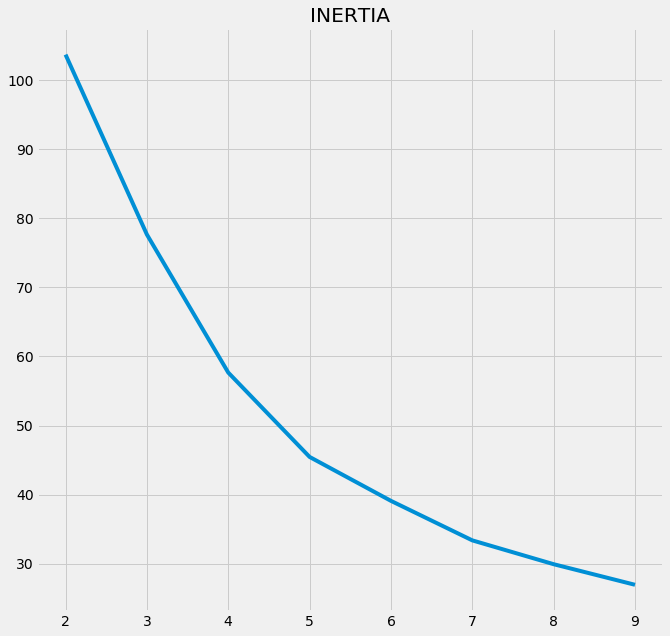

In [904]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

In [942]:
# инерция показывает, что оптимальным количеством кластером является 4 шт.
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

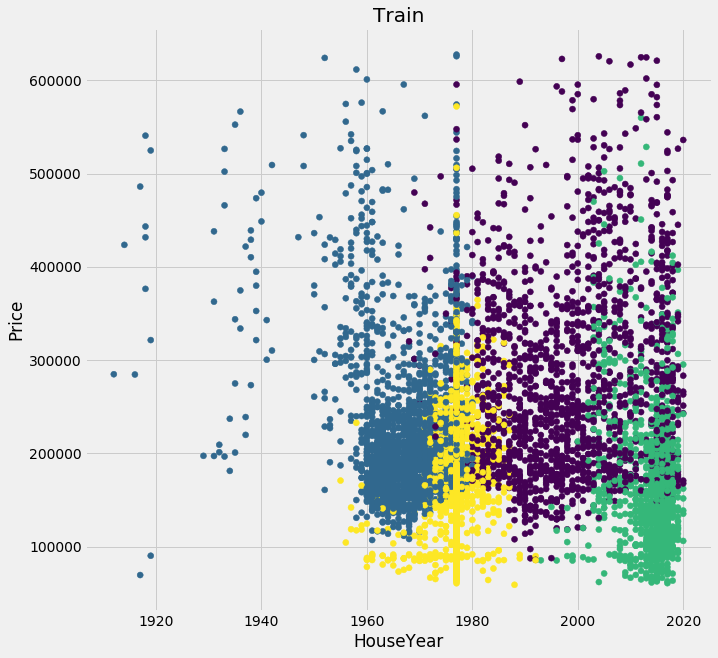

In [906]:
plt.scatter(train['HouseYear'],train['Price'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.title('Train')

In [943]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(train_scaled,train['cluster_year'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

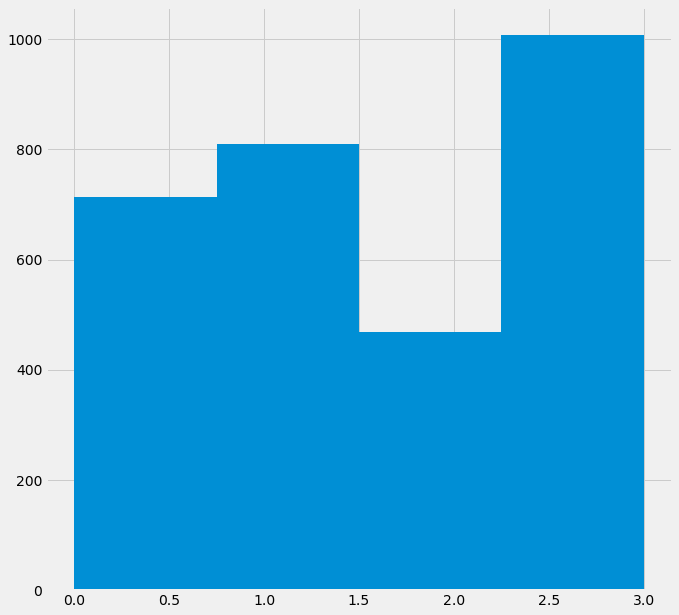

In [944]:
valid_scaled=scaler.transform(valid.loc[:,["HouseYear",'Price_by_metr']])
valid['cluster_year']=knn.predict(valid_scaled)
valid['cluster_year'].hist(bins=4)

In [945]:
# кластеризую районы по количеству проданных квартир
distr_info=data['DistrictId'].value_counts().reset_index().\
    rename(columns={"index":"DistrictId","DistrictId":'large_district'})

In [946]:
distr_info.sort_values(by = 'DistrictId').head()

,DistrictId,large_district
57,0,48
1,1,652
32,2,78
29,3,82
130,4,11


In [947]:
distr_info.describe()

,DistrictId,large_district
count,205.000000,205.000000
mean,102.131707,48.780488
std,59.548112,97.399046
min,0.000000,1.000000
25%,51.000000,7.000000
50%,102.000000,18.000000
75%,153.000000,56.000000
max,209.000000,851.000000


In [948]:
scaler=MinMaxScaler()
distr_info_scalled=scaler.fit_transform(distr_info.loc[:,['DistrictId','large_district']])
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(distr_info_scalled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

6.480063760084031
4.027355033247839
2.3062785977622378
1.5347105843357438
1.1749712729152273
0.9397724617551905
0.8026199907591474
0.7038706788025857


Text(0.5, 1.0, 'INERTIA')

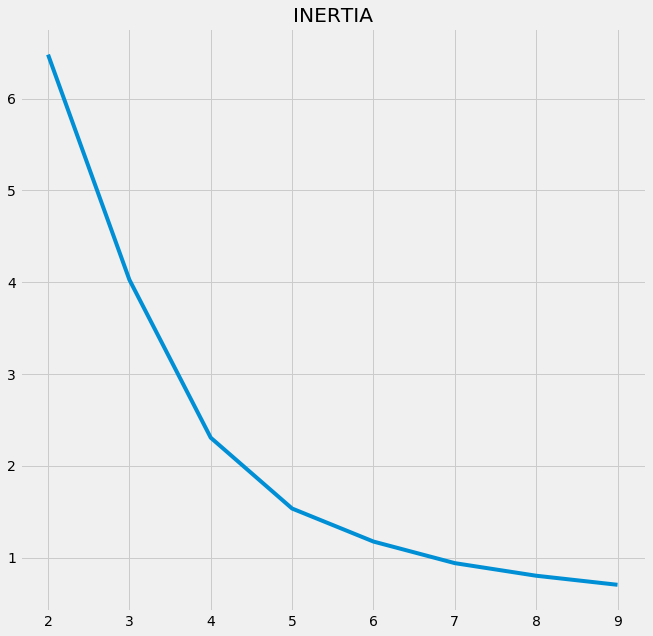

In [913]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

In [950]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
distr_info['cluster_dist']=model.fit_predict(distr_info_scalled)

Text(0.5, 1.0, 'cluster_dist')

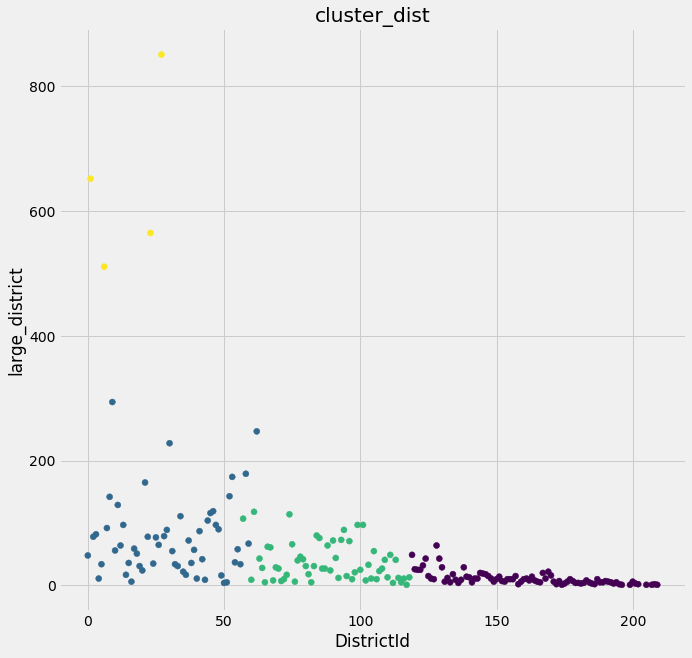

In [951]:
plt.scatter(distr_info['DistrictId'],distr_info['large_district'],c=distr_info['cluster_dist'])
plt.xlabel('DistrictId')
plt.ylabel('large_district')
plt.title('cluster_dist')

In [952]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(distr_info_scalled,distr_info['cluster_dist'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [919]:
distr_info['cluster_dist'].describe()

count    205.000000
mean       0.907317
std        0.883506
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cluster_dist, dtype: float64

In [921]:
distr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
DistrictId        205 non-null int64
large_district    205 non-null int64
cluster_dist      205 non-null int64
is_large          205 non-null int32
dtypes: int32(1), int64(3)
memory usage: 5.7 KB


In [953]:
def add_distr_info(df,distr_info):
    df=pd.merge(df,distr_info,on='DistrictId',how='left')
    df['large_district']=df['large_district'].fillna(1)
    return df

In [954]:
price=train['Price'].mean()
price_by_metr=train['Price_by_metr'].median()
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'median'}).\
                    rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_dr'})


In [924]:
mean_price_m2_dr.head()

,DistrictId,Rooms,Price_by_metr
0,0,1.0,2852.0
1,0,2.0,3510.0
2,0,3.0,4381.0
3,1,1.0,3426.0
4,1,2.0,3193.0


In [925]:
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,1.0,155415.247960
1,2.0,200743.825655
2,3.0,269029.391523
3,4.0,376419.535842
4,5.0,434774.356335


In [926]:
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [955]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left') 
    df['mean_price_dr']=df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr']=df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms']= df['mean_price_by_rooms'].fillna(price)
    
    return df

In [956]:
def prepare_data(df,distr_info,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_info(df,distr_info)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [957]:
train=prepare_data(train,distr_info,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [958]:
def dummies(df,cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [959]:
train=dummies(train)

In [960]:
feats = ['Rooms','Square','pers_LifeSquare','pers_KitchenSquare','HouseYear', \
            'cluster_dist',  'Ecology_2_A','Ecology_2_B', 'Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B', \
  'mean_price_dr', 'mean_price_by_rooms']
#feats=['large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [961]:
from sklearn.ensemble import RandomForestRegressor as RF
model=RF(n_estimators=40,max_depth=10,random_state=42)
model.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [962]:
valid=add_distr_info(valid,distr_info)
valid=add_mean_price(valid,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [963]:
from sklearn.ensemble import RandomForestRegressor as RF
y_pred=model.predict(valid.loc[:,feats])
from sklearn.metrics import r2_score as r2
r2(valid['Price'],y_pred)

0.6639284416565837

In [964]:
r2(train['Price'],model.predict(train.loc[:,feats]))

0.872000025661065

In [965]:
test=add_distr_info(test,distr_info)
test=add_mean_price(test,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [968]:
test=pd.get_dummies(test)

In [978]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 28 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             5000 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
large_district         5000 non-null float64
cluster_dist           4992 non-null float64
mean_price_dr          5000 non-null float64
mean_price_by_rooms    5000 non-null float64
Ecology_2_A

In [975]:
test['LifeSquare'] = test['LifeSquare'].fillna(0)
test['pers_LifeSquare'] =   round(test['LifeSquare']/test['Square'],2)
test['pers_KitchenSquare'] =   round(test['KitchenSquare']/test['Square'],2)

In [980]:
test['cluster_dist'] = test['cluster_dist'].fillna(test['cluster_dist'].median())

In [979]:
test['cluster_dist'].median()

1.0

In [981]:
test['Price']=model.predict(test.loc[:,feats])

In [982]:
test.loc[:,feats].head()

,Rooms,Square,pers_LifeSquare,pers_KitchenSquare,HouseYear,cluster_dist,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms
0,2.0,49.882643,0.67,0.12,1972,1.0,0,1,0,1,0,1,170278.368262,200743.825655
1,2.0,69.263183,0.00,0.01,1977,2.0,0,1,0,1,0,1,240692.688382,200743.825655
2,1.0,13.597819,1.17,0.88,1909,0.0,0,1,0,1,0,1,155415.247960,155415.247960
3,2.0,73.046609,0.71,0.12,2007,1.0,0,1,0,1,0,1,198197.383850,200743.825655
4,1.0,47.527111,0.91,0.02,2017,3.0,0,1,0,1,1,0,123468.815347,155415.247960


In [983]:
test.loc[:,['Id','Price']].to_csv('AGruzdov_predictions.csv',index=None)